Earlier we compute hypothesis testing and confidence interval for proportions, but what if succeses and failures conditions are not met? In this blog, we choose the alternative way, doing simulation

![jpeg](../galleries/coursera-statistics/5w26.jpg)


*Screenshot taken from [Coursera](https://class.coursera.org/statistics-003/lecture/123) 03:07*

So here we take a real problem. Paul the octopus can predict all 8 world cups game correctly. He only have two choices, so we can expect there are two possible outcome. The null hypothesis states his choice are random and have 50% chance. The alternative hypothesis would be paul is better guess than just random. Then we set null and alternative hypothesis test. But we have one problem, **we have too small sample size**. What do we do?

<!--TEASER_END-->

We can make **inference based on simulation**.

* The focus here is the p-value. Remember p-value is probability of observing at least as favorable to the outcome given the null hypothesis is true.
* Devise the simulation that assumes null hypothesis is true. Since we have two mutually exclusive outcome, we can use head/tail of fair coin(use fair because we assume null hypothesis is true, proportions are equal). So we flip coin 8 times and record the proportion of heads come out(success).
* Repeat the simulation of N-times takes record relevant sample statistics, in this case the proportion.
* Calculate p-value as the probability of at least favorable to the observed outcome. What is the probability that the proportions of heads is at least as an observed outcome. So what are the probability that simulations head comes at least 8 times. Remember that proportion hat is correctly guess of all 8 times, so the p hat is 1.

![jpeg](../galleries/coursera-statistics/5w27.jpg)


*Screenshot taken from [Coursera](https://class.coursera.org/statistics-003/lecture/123) 08:10*

If we flip coin by hand we will get (almost, try to always says this because it never exact) zero for 10 times simulation. For 10,000 simulations however, we can use inference method in R

In [2]:
source("http://bit.ly/dasi_inference")

Single proportion -- success: yes 
Summary statistics: p_hat = 1 ;  n = 8 
H0: p = 0.5 
HA: p > 0.5 
p-value =  0.0034 


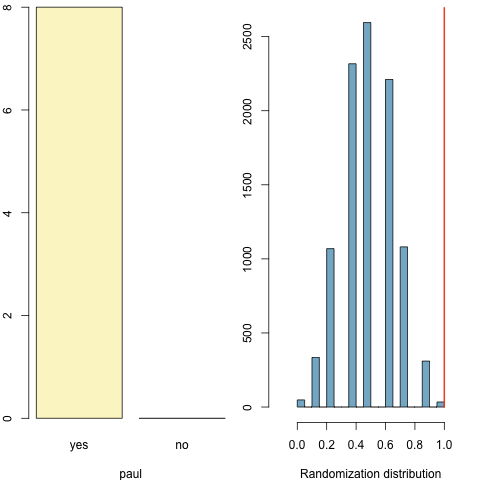

In [7]:
paul = factor(c(rep('yes',8),rep('no',0)), levels=c('yes','no'))
inference(paul,est='proportion',type='ht',method='simulation',success='yes',null=0.5,alternative='greater')

Receiving our p-value, we reject the null hypothesis

We given that paul was randomly guessing, the probability of he guess all 8 times correctly, he would get 0.0037. So we reject the null hypothesis, and Paul did better than randomly guessing. This also must be account that we may have made type 1 error. We may have too few sample size, so it will be skewed, and rejecting that Paul did not randomly choosing, when he indeed did that.

# Examples

![jpeg](../galleries/coursera-statistics/5w29.jpg)


*Screenshot taken from [Coursera](https://class.coursera.org/statistics-003/lecture/129) 01:08*

People is independent towards one another. This data is without replacement, and each people represent one observation. There's 10 possible outcomes, and they choose only one of them. So the probability of success is one of ten, 0.1

![jpeg](../galleries/coursera-statistics/5w28.jpg)


*Screenshot taken from [Coursera](https://class.coursera.org/statistics-003/lecture/123) 03:33*

Single proportion -- success: yes 
Summary statistics: p_hat = 0.9167 ;  n = 12 
H0: p = 0.1 
HA: p > 0.1 
p-value =  0 


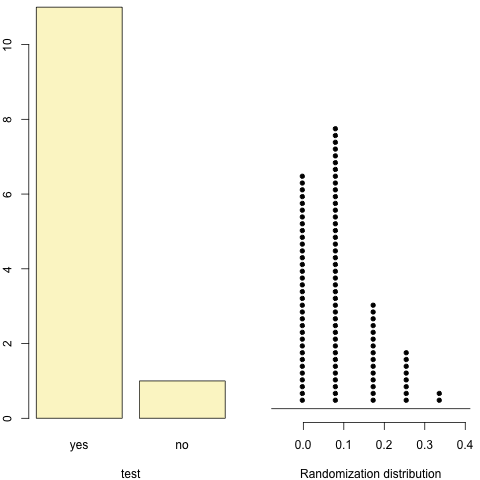

In [7]:
test = factor(c(rep('yes',11),rep('no',1)), levels=c('yes','no'))
inference(test,est='proportion',type='ht',method='simulation',success='yes',null=0.1,alternative='greater',nsim=100)

So eleven out of twelve people correctly guess the back of their hand. Since this is the data from our study, proportion hat is 0.9167. proportion that we are going to test is the proportion in population given that this is random choosing, 0.1 (1/10 proportion of successfully predicting 1 out of 10 picture). Remember that we only focus on the probability of correctly choose. p-value is practically zero. So there is 0% chance that 11 or more out of 12 people correctly guess a picture of their back hand, if in back they were randomly guessing.

# Comparing two small sample proportions

![jpeg](../galleries/coursera-statistics/5w31.jpg)


*Screenshot taken from [Coursera](https://class.coursera.org/statistics-003/lecture/131) 00:59*

In a previous section, we use the study of back hand experiment to test hypothesis testing on small sample size. The study then repeated whether each of the experiment know the palm of their hands. Again we're faced with small sample size experiment.

![jpeg](../galleries/coursera-statistics/5w32.jpg)


*Screenshot taken from [Coursera](https://class.coursera.org/statistics-003/lecture/131) 03:12*

Within groups,the observations will be independent for each other. But not so for between groups(paired data). For sample size, we're calculating pool proportion.Thankfully, we know the proportion total of each groups, 0.75 (specified earlier)

![jpeg](../galleries/coursera-statistics/5w33.jpg)


*Screenshot taken from [Coursera](https://class.coursera.org/statistics-003/lecture/131) 03:57*

We can do this by using inference function

![jpeg](../galleries/coursera-statistics/5w34.jpg)


*Screenshot taken from [Coursera](https://class.coursera.org/statistics-003/lecture/131) 04:37*

### Summary

In numerical variables, we use t-distribution for inference means in small sample size condition. But that's not the case for categorical, t-distribution is exclusive to means. For categorical, we have no option but to use simulation. For one categorical varibale, we generate simulated samples given null hypothesis, and observed the proportion of success at least as extreme observed outcome.For two categorical variable, we use randomization test. Use bootstrap for categorical variables with at most 2 levels, for calculating confidence interval.

# Chi-Square GOF Test

In this section we're going to discuss categorical variables, with more than two levels. chi-square goodness of fit will be map our distribution into hypothetical distribution.

![jpeg](../galleries/coursera-statistics/5w36.jpg)


*Screenshot taken from [Coursera](https://class.coursera.org/statistics-003/lecture/133) 01:12*

Response variable: categorical, Explanatory variable: categorical
Difference between two proportions -- success: yes
Summary statistics:
     x
y     back palm Sum
  yes   11    7  18
  no     1    5   6
  Sum   12   12  24
Observed difference between proportions (back-palm) = 0.3333
H0: p_back - p_palm = 0 
HA: p_back - p_palm != 0 
p-value =  0.26 


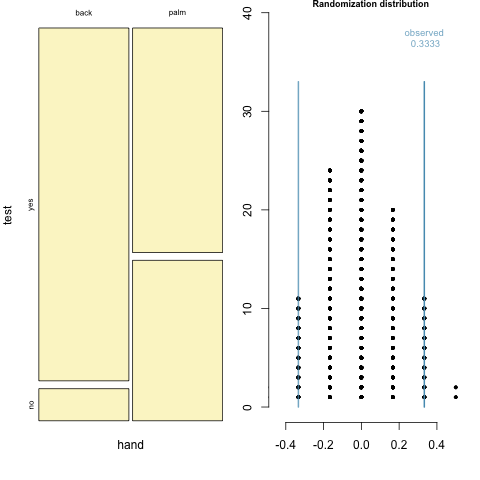

In [25]:
test = factor(c(rep('yes',11),rep('no',1),rep('yes',7),rep('no',5)), levels=c('yes','no'))
hand = factor(c(rep('back',12),rep('palm',12)), levels=c('back','palm'))
inference(y=test,x=hand,est='proportion',type='ht',method='simulation',success='yes',
          null=0,alternative='twosided',nsim=100)

Let's take a look at the example given. Suppose a categorical variable that tells which race has too many proportion for jury. We're given proportion in population, as well as sample we took with 2500 people.

![jpeg](../galleries/coursera-statistics/5w37.jpg)


*Screenshot taken from [Coursera](https://class.coursera.org/statistics-003/lecture/133) 02:35*

So, let's say the court points you as a statiscian to determine if it indeed a racist selection, and you use hypothesis test. As always, the null hypothesis will states as nothing going on, simple random sample of selecting from the population, the distribution of jurors will follow the population distribution. While alternative hypothesis states that there are indeed something going on. It's not simple random sample, and the selection did not follow proportion population.

So will we evaluate the hypothesis?

* Quantify the difference of observed and expected counts.
* If there's large deviations between observed and expected counts, we will reject the null hypothesis and favor the alternative.
* This often called **goodness of fit**, where we evaluate how fit the observed to the expected distribution.

![jpeg](../galleries/coursera-statistics/5w39.jpg)


*Screenshot taken from [Coursera](https://class.coursera.org/statistics-003/lecture/133) 05:00*

So how we calculate expected counts? Earlier we're given race percentage of the population, so we build expected counts of total observed counts with race proportion population. So you see each of the percentage generate counts in the observed. This will give us foundations as the difference of observed and expected. You might round values into nearest integer(especially since we're talking about people counts, hence numerical variable), don't forget validate the counts to equals total observed counts.

Chi-square conditions are:

* **Independence sample observation**.
    * Random sampling/assignment
    * Sampling without replacement, less than 10% population.
    * Each case only belong to one cell in the table. In this example, we don't want one people that perhaps white-black, belong to cell white and black. Choose one of which.
* **Sample size/skew**. Each cell in the table has at least 5 cases.
    

Earlier, we have calculate the expected counts. And you can see, each cell has at least 5 cases. We have independent cases where earlier we took 2500 random sampling observation.

Recall the formula of test statistics. When we have difference between null value and observed value, divided by standard error of that point estimate. This gives us two advatantages. First we can see the difference, and second we can convert it into standardized distribution.

![jpeg](../galleries/coursera-statistics/5w40.jpg)


*Screenshot taken from [Coursera](https://class.coursera.org/statistics-003/lecture/133) 08:03*

This new statistic is called **chi-square ($X^2$) statistics**. Each cell will take difference between observed and expected, squared, divided by expected counts. Then we will sum the difference. This is much like test statistic formula in the previous.

Why square?

* We want to take positive difference. If one of them is negative, it will cancel each other. But this can be calculate using absolute value. There's another argument for the square.
* We magnitude the difference. So larger difference will appear more than smaller difference. 

![jpeg](../galleries/coursera-statistics/5w41.jpg)


*Screenshot taken from [Coursera](https://class.coursera.org/statistics-003/lecture/133) 09:19*

so chi-square distribution only has single parameter, degree of freedom, which can be calculated as k-1, k as number of cells. This alone will explained us about shape, cented, and spread of the distribution.

Take a look at difference degree of freedom will give, focus on each of the center,shape, and spread distribution.

![jpeg](../galleries/coursera-statistics/5w42.jpg)


*Screenshot taken from [Coursera](https://class.coursera.org/statistics-003/lecture/133) 09:36*

So let's put everything together.

![jpeg](../galleries/coursera-statistics/5w44.jpg)


*Screenshot taken from [Coursera](https://class.coursera.org/statistics-003/lecture/133) 11:12*

Taking the chi-square statistic earlier, we sum up difference cell squared divided by its expected, and get 22.63. We also have 5 cell -1 = 4 as our degree of freedom.

![jpeg](../galleries/coursera-statistics/5w45.jpg)


*Screenshot taken from [Coursera](https://class.coursera.org/statistics-003/lecture/133) 11:57*

Next, we're draw our distribution, and shade the p-value. chi-square statistic will always positive(note that it's squared), hence we have right skewed distribution(higher dof, appproach normal however). So we only shade the p-value in the upper tail, making it one sided p-value, just like F-statistics.

![jpeg](../galleries/coursera-statistics/5w46.jpg)


*Screenshot taken from [Coursera](https://class.coursera.org/statistics-003/lecture/133) 14:31*

Three methods can be used. Using R,

In [1]:
chi_square = 22.63
dof = 4

pchisq(chi_square,dof,lower.tail = F)

[1] 0.000150104

We have much smaller number compared to usual significance level, hence we reject the null hypothesis. And conclude that the data provide convincing evidence that the observed counts distribution of race ethnicity for jurors did not follow population distribution.So there are indeed injustice for jurors selection.

# Chi-Square Independence Test

In this section, we will talk aobut how we're dealing with two categorical variables, one of which has outcome higher than two levels.

![jpeg](../galleries/coursera-statistics/5w47.jpg)


*Screenshot taken from [Coursera](https://class.coursera.org/statistics-003/lecture/159) 01:07*

Study taken to measure the relationship of obesity and relationship status. Obese defined as people that's more than 30 BMI. Here we have contigency table.

For hypothesis testing, we set our null hypothesis as two categorical variables are **independent**. There is nothing going on. Where alternative hypothesis testing, we states that there is indeed something going on, the categorical variables are **dependent**. Below showing mosaic plot, where we first divide into  relationship groups(explanatory variable),and then observe the weight status(response variables).

![jpeg](../galleries/coursera-statistics/5w48.jpg)


*Screenshot taken from [Coursera](https://class.coursera.org/statistics-003/lecture/159) 01:46*

How to evaluate hypotheses?

* We're quantify the observed and expected counts difference.
* When we have large deviations, we observed the probability given that this is sampling variability(due to chance).
* This called **independence** test, because we're observing the relationship of both categorical variables.

![jpeg](../galleries/coursera-statistics/5w49.jpg)


*Screenshot taken from [Coursera](https://class.coursera.org/statistics-003/lecture/159) 03:53*

We have almost similar between chi-square GOF, and chi-square independence test. Here we  have the formula for calculating chi-square statistics,  where we observed the accumulated difference between expected and observe squared, divided by its expected. While in chi-square GOF we have k-1, where k is number of cells, we incorporate the number of rows and columns. The conditions for chi-square GOF and chi-square independence is same.

![jpeg](../galleries/coursera-statistics/5w50.jpg)


*Screenshot taken from [Coursera](https://class.coursera.org/statistics-003/lecture/159) 06:55*

Let's focus on the obese level. If we want to calculate the expected counts, we observed what are the proportion of each of the explanatory variable(relationship status), based on the obese rate. For obese rate, we can calculate total obesity in population, regardless of the relationship status. This will gives us 25.6% rate. Next, for each of the relationship status, we're calculates the expected obese counts, hence multiplying each by obesity rate. After we get the expected counts, always validate your counts if it does in fact match the total people obese.

So expected counts in two-way tables,

$$ expected count = \frac{rowtotalxcolumntotal}{tabletotal}$$

Remember that we get row rate by observing one row, and divide by table total. And we apply the row rate to each of the column total.Take obese-dating for example. Based on the formula, we actually calculate it by:

    row total = 331 (total obese)
    column total = 440 (total dating)
    table total = 1293 (grand total)
    
$$expected count = \frac{331x440}{1293} = 113$$

![jpeg](../galleries/coursera-statistics/5w51.jpg)


*Screenshot taken from [Coursera](https://class.coursera.org/statistics-003/lecture/159) 09:39*

In [2]:
#Given chisquare statistic and degree of freedom, compute the chi-square

pchisq(31.68,2,lower.tail=F)

[1] 1.320613e-07

Earlier, we focus on one row, obesity. chi-square actually takes all row. Here incorporates all cell into equation for chi-square calculation. We also have degree of freedom, and using R, we have much smaller p-value. Hence we reject null hypothesis and favor the alternative.Thus the data provide convincing evidence, that obesity and relationship are related.

Can we make conclusion that relationship cause obesity? No we can't. Recall that this is observational study, and we can only make correlation.There's might be confounding variable (like age, etc.) that comes into play(as age get older, relationship status cahnged).

So we have two types of chi-square. Chi-square GOF compare one categorical variable (with more than 2 levels) to hypothesized distribution. Where chi-square independence test, evaluate the relationship between two catgorical variable (at least one with more than two levels).

### Summary:

Chi-square GOF test one single categorical variable whether it follows hypothesized distribution or not. Null hypothesis states that the observed proportion follows population proportion, and there isn't something going on. On the other hand,alternative hypothesis states the observed proportion doesn't follow population proportion, and there is indeed something going on.For one way table, we can calculate expected counts for each cell, by sample sized times each of proportion in hypothesized distribution.

We can calculate chi-square statistics by calculate the difference of observed and expected squared, divided by expected, and sum all of the cells. For one categorical variable, degree of freedom can be calculated by k-1, as k is the number of groups. For two categorical variable, dof calculated as (R-1)x(C-1) where R is number of rows, and C is number of columns.

The conditions for both chisquare GOF and independence test, is that observations are independent of one another. The expected counts for each cell is at least 5. And degree of freedom is at least two(more than 2 levels outcome). If this condition is not met, we use other methods, such as evaluating proportions.We then calculate each cell incorporate it into chi-square statistic, then using the statistics, degree of freedom and lower tail false to obtain p-value.

For chi-square independence test, we test two categorical variables, whether they independent or dependent of one another. We can't use confidence intervals for this problem, since we observe both variables with many levels(not observe one level in one of the variables). If p-value is above significance level, we failed to reject null hypothesis, and conclude that the data provide strong evidence that both categorical variables are indeed dependent.

> **REFERENCES**:

> Dr. Mine Çetinkaya-Rundel, [Cousera](https://class.coursera.org/statistics-003/lecture)